In [1]:
import numpy  as np
import pandas as pd

import seaborn           as sns
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap

from sklearn.decomposition import PCA


sns.set_context(context='poster')

In [2]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

xkcd_rgb = pd.read_csv(
    'https://xkcd.com/color/rgb.txt', 
    sep='\t', skiprows=1, header=None, 
    usecols=[0,1], names=['Name','hex']
)


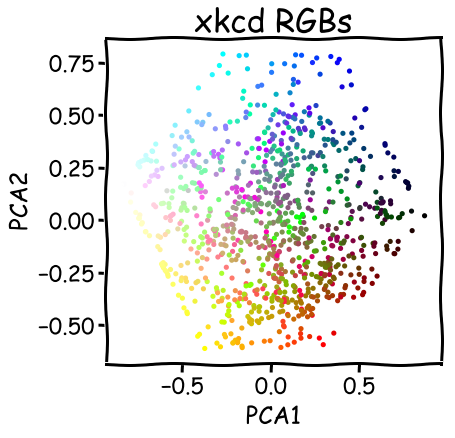

In [3]:
xkcd_rgbs = np.array( sns.xkcd_palette(xkcd_rgb['Name']) )

model_pca = PCA(  n_components=2, random_state=2019 )
pca_rgbs  = model_pca.fit_transform( xkcd_rgbs )


fig_df = pd.concat(
    [
        xkcd_rgb[['Name','hex']],
        pd.DataFrame(pca_rgbs).rename(columns={0:'PCA1',1:'PCA2'})
    ], axis=1
)

# plt.xkcd()
with plt.xkcd():
    fig, ax = plt.subplots(1,1, figsize=(6,6))

    ax.scatter(fig_df['PCA1'],fig_df['PCA2'],c=fig_df['hex'],s=10)
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')
    ax.set_title('xkcd RGBs',fontsize=32)
    for axis in ['top','bottom','left','right']:
          ax.spines[axis].set_linewidth(3)

fig.savefig('xkcd_rgbs_PCA.svg', bbox_inches='tight',)
fig.savefig('xkcd_rgbs_PCA.png', bbox_inches='tight',)

plt.show()

In [4]:
def color_pal_plot(pal):
    '''
    Modified from sns.palplot
    '''
    n = len(pal)
    f, ax = plt.subplots(1, 1, figsize=(n, 1))
    ax.imshow(np.arange(n).reshape(1, n),
              cmap=ListedColormap(list(pal)),
              interpolation="nearest", aspect="auto")

    ax.set_xticks([])
    ax.set_yticks([])

    return f, ax

In [5]:
my_colos_c_names = fig_df.query('-0.4<PCA1<0.4')['Name'].values

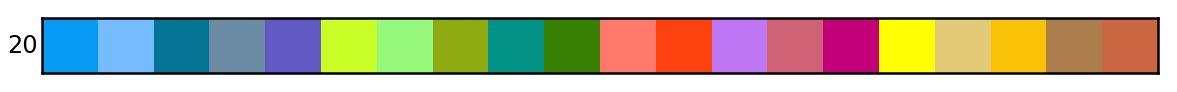

In [6]:
xkcd_name_list = [
    # Blue
    'azure',
    'sky blue',
    'sea blue',
    'grey blue', #'steel blue', 'blue grey',
    'iris',

    # Green
    'green yellow',
    'light green',
    'pea green',
    'teal',
    'dark grass green',

    
    # Red
    'salmon',
    'orangered',
    'light purple',
    'rose',
    'magenta',

    # Yellow
    'bright yellow',
    'sand',
    'goldenrod',
    'tan brown',
    'terracotta',
    
]
dif_set = set(xkcd_name_list) - set( [ i for i in xkcd_name_list if i in my_colos_c_names ] )
if len( dif_set ) == 0:
    f, ax = color_pal_plot(sns.xkcd_palette(xkcd_name_list))
    ax.set_ylabel(str(len(xkcd_name_list)), rotation=0, va='center', ha='right')
    
    f.savefig('xkcd_rgbs_20.svg', bbox_inches='tight',)
    f.savefig('xkcd_rgbs_20.png', bbox_inches='tight',)

    plt.show()
else:
    print ('Missing ', dif_set)

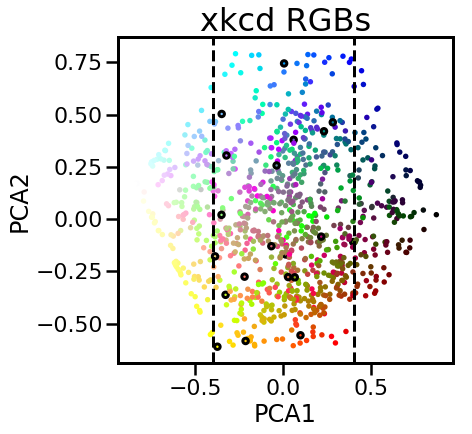

In [7]:

fig_df = pd.concat(
    [
        xkcd_rgb[['Name','hex']],
        pd.DataFrame(pca_rgbs).rename(columns={0:'PCA1',1:'PCA2'})
    ], axis=1
)
fig_df['edge'] = 0
fig_df = fig_df.set_index('Name')
fig_df.loc[xkcd_name_list,'edge'] = 3
fig_df = fig_df.reset_index()

fig, ax = plt.subplots(1,1, figsize=(6,6))

ax.scatter( fig_df['PCA1'], fig_df['PCA2'], c=fig_df['hex'], s=30, edgecolors='k', linewidth=fig_df['edge'])

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_title('xkcd RGBs',fontsize=32)
for axis in ['top','bottom','left','right']:
      ax.spines[axis].set_linewidth(3)

ax.axvline(-0.4,linestyle='--', color='k')
ax.axvline( 0.4,linestyle='--', color='k')

plt.show()


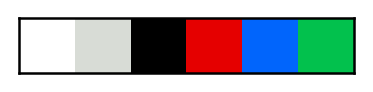

In [8]:
keep_colors_names = ['white', 'light grey', 'black', 'red', 'bright blue', 'shamrock green',]

f, ax = color_pal_plot(sns.xkcd_palette(keep_colors_names))
f.savefig('xkcd_rgbs_vip6.svg', bbox_inches='tight',)
f.savefig('xkcd_rgbs_vip6.png', bbox_inches='tight',)

plt.show()

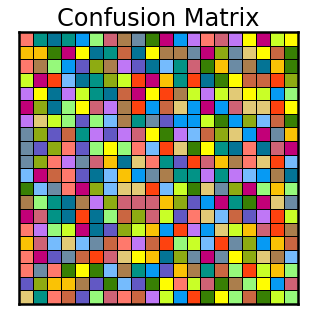

In [9]:
rgb_list = sns.xkcd_palette(xkcd_name_list)

n = len(rgb_list)

matrix = np.random.permutation(np.repeat(np.arange(0,n),n)).reshape(n,n)

m_id_x = np.repeat(np.arange(0,n),n).reshape(n,n)
m_id_y = m_id_x.T
m_id_x = m_id_x.flatten()
m_id_y = m_id_y.flatten()
c_list = [ rgb_list[matrix[i]] for i in list(zip(m_id_x,m_id_y)) ]

fig, ax = plt.subplots(1,1, figsize=(5,5))

ax.scatter(
    x         = m_id_x,
    y         = m_id_y,
    color     = c_list,
    edgecolor = 'k',
    marker    = 's', 
    s         = 200,
    linewidth = 1,
    zorder    = 1,
)
ax.set_xlim([-0.5, n-0.5])
ax.set_ylim([-0.5, n-0.5])

ax.set_xticks([])
ax.set_yticks([])

ax.set_title('Confusion Matrix')

fig.savefig('xkcd_rgbs_Confusion.svg', bbox_inches='tight',)
fig.savefig('xkcd_rgbs_Confusion.png', bbox_inches='tight',)

plt.show()